In [1]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import *
import scipy.constants as const

\begin{equation}
R(>F_{min}) = \frac {R_o {F_o}^{-\alpha} c^2}{4 \pi} \left[  \frac{  \rm{SNR}_{\rm{min}} ~ kT_{sys} ~\tau_b}{ 2~\sqrt{f ~ \tau_b  }  } \right]  ^{\alpha}A_{el} ^{-\alpha-1} ~{\nu_s}^{-\alpha/2-2} ~{n^{-\alpha}}.
\end{equation}

In [2]:
#################################################################################
#Constants
#################################################################################

R0 = 1700 # /yr Parkes, previous surveys
F0 = 2 # Jy.ms fluence threshold 
c = 299792458
pi = np.pi
SNR = 10
k = 1830.64  # boltzmnann constant in terms of Jy m^2 k^-1
Tsys = 50 # K 
f = 0.66 
t = 2 # 2ms

#################################################################################
alpha = [-1, -1.5, -2]
alpha = np.array(alpha, dtype=np.float64)
nu = [400, 800, 1600]   # MHz
nu = np.array(nu, dtype=np.float64)
#################################################################################

In [3]:
def frbrate(A, nu, n, alpha):
    k1 = R0 * np.power(F0,np.negative(alpha)) * (c ** 2) / ( 4 * pi)
    k2 = np.power(((SNR * k * Tsys * t)/(2 * np.sqrt(f*t*1e-3))),alpha)
    k3 = np.power(A,(-1-alpha)) * np.power(nu*1e6,-2-alpha/2) * np.power(n,np.negative(alpha))
    return  k3 * k2 * k1 

### Cost model

For Dish Arrays $C_d = D_o A_{el}^{1.25} ~n $

For aperture array tiles we adopt Radiation Collector cost function $C_a = A_o ~m ~n$, where $A_o$ is the cost of an individual dipole-like antenna

For the Signal Processor we adopt the cost function $ Cs= S_0 f \nu n. $

In [4]:
cost = 2000 #cost units (fixed)
# cost model constants:
D0 = 0.029
A0 = 0.067
S0 = 2.3e-3

In [5]:
# range of effective areas of each dish element considered
Ael = np.arange(0.1,30, 0.1)
Ael = np.array(Ael, dtype=np.float64)
#################################################################################
# calcualting  'n' number of dishes in Ael 
n = [ cost/(D0*np.power(Ael,1.25) + S0*f*nu[0]),   # 400
     cost/(D0*np.power(Ael,1.25) + S0*f*nu[1]),    # 800
     cost/(D0*np.power(Ael,1.25) + S0*f*nu[2])]    # 1600

In [6]:
# for aperture array
n_lin = np.arange(0,40,1)  # number of elements in each square cluster along one dimension
n_lin = np.array(n_lin, dtype=np.float64)
m = np.power(n_lin,2)  # total numbner of elements in each aperture array group


single_antenna_area = (c/400e6)**2/pi # effective area at 400MHz for pi ster field of view
Aeff = [single_antenna_area * m,
        single_antenna_area * m/4.,
        single_antenna_area * m/16.]

# calcualting 'n_array' number of apperture array elements 

n_array = [ cost/((A0 * m)  + (S0*f*nu[0])),   # 400
     cost/((A0 * m)  + (S0*f*nu[1])),    # 800
     cost/((A0 * m)  + (S0*f*nu[2]))]    # 1600

In [7]:
#################################################################################
# for 400MHz dish
rate400_a1_d =  frbrate(Ael, nu[0], n[0], alpha[0]) # alpha -1
rate400_a15_d =  frbrate(Ael, nu[0], n[0], alpha[1])  # alpha -1.5
rate400_a2_d =  frbrate(Ael, nu[0], n[0], alpha[2])  # alpha -2

# for 400MHz aperture array
rate400_a1_aa =  frbrate(Aeff[0], nu[0], n_array[0], alpha[0]) # alpha -1
rate400_a15_aa =  frbrate(Aeff[0], nu[0], n_array[0], alpha[1])  # alpha -1.5
rate400_a2_aa =  frbrate(Aeff[0], nu[0], n_array[0], alpha[2])  # alpha -2

#################################################################################
# for 800MHz dish
rate800_a1_d =  frbrate(Ael, nu[1], n[1], alpha[0]) # alpha -1
rate800_a15_d =  frbrate(Ael, nu[1], n[1], alpha[1])  # alpha -1.5
rate800_a2_d =  frbrate(Ael, nu[1], n[1], alpha[2])  # alpha -2


# for 800MHz aperture array
rate800_a1_aa =  frbrate(Aeff[1], nu[1], n_array[1], alpha[0]) # alpha -1
rate800_a15_aa =  frbrate(Aeff[1], nu[1], n_array[1], alpha[1])  # alpha -1.5
rate800_a2_aa =  frbrate(Aeff[1], nu[1], n_array[1], alpha[2])  # alpha -2

#################################################################################
# for 1600MHz dish

rate1600_a1_d =  frbrate(Ael, nu[2], n[2], alpha[0]) # alpha -1
rate1600_a15_d =  frbrate(Ael, nu[2], n[2], alpha[1])  # alpha -1.5
rate1600_a2_d =  frbrate(Ael, nu[2], n[2], alpha[2])  # alpha -2

# for 1600MHz aperture array
rate1600_a1_aa =  frbrate(Aeff[2], nu[2], n_array[2], alpha[0]) # alpha -1
rate1600_a15_aa =  frbrate(Aeff[2], nu[2], n_array[2], alpha[1])  # alpha -1.5
rate1600_a2_aa =  frbrate(Aeff[2], nu[2], n_array[2], alpha[2])  # alpha -2
#################################################################################

<IPython.core.display.Javascript object>


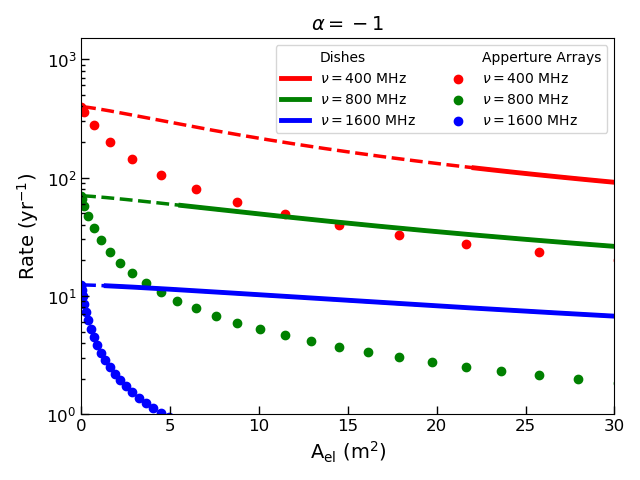

In [8]:
fig, ax = subplots()

plot(Ael, rate400_a1_d , lw = 2.5 ,ls ='--', c = 'r')
plot(Ael, rate800_a1_d , lw = 2.5, ls = '--', c = 'g')
plot(Ael, rate1600_a1_d, lw = 2.5, ls = '--', c = 'b')


# Dishes with diameter < 5 lamda not made

i0 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[0]*1e6)),2)/0.5))
i1 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[1]*1e6)),2)/0.5))
i2 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[2]*1e6)),2)/0.5))

plot([], [], label = r'Dishes', lw = 3.5, c = 'w', alpha = 0.01 )
plot(Ael[i0], rate400_a1_d[i0], label = r'$\nu = 400 \ \rm{ MHz}$', lw = 3.5, c = 'r' )
plot(Ael[i1], rate800_a1_d[i1], label = r'$\nu = 800 \ \rm{ MHz}$',  lw = 3.5, c = 'g' )
plot(Ael[i2], rate1600_a1_d[i2], label = r'$\nu = 1600 \ \rm{ MHz}$', lw = 3.5, c = 'b' )

scatter([], [], label = r'Apperture Arrays',  c = 'w', alpha = 0.01 )
scatter(Aeff[0], rate400_a1_aa, label = r'$\nu = 400 \ \rm{ MHz}$',  c = 'r' )
scatter(Aeff[1], rate800_a1_aa, label = r'$\nu = 800 \ \rm{ MHz}$',  c = 'g' )
scatter(Aeff[2], rate1600_a1_aa, label = r'$\nu = 1600 \ \rm{ MHz}$', c = 'b' )


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

xticks(fontsize = 12)
yticks(fontsize = 12)

yscale("log")
xlabel(r'$\rm{A_{el} \ (m^2)}$',fontdict=font)
ylabel(r'Rate ($\rm{yr^{-1}}$)', fontdict=font)
title(r'$\alpha = -1$',fontdict=font)
ax.tick_params(which='both', direction = 'in')
ax.tick_params(which='major', length=6, width = 1)
ax.tick_params(which='minor', length=3, width = 1)

legend(ncol = 2)

xlim(0,30)
ylim(1, 1.5e3)
tight_layout()
savefig('ratevsaeff_alpha1.png')

<IPython.core.display.Javascript object>


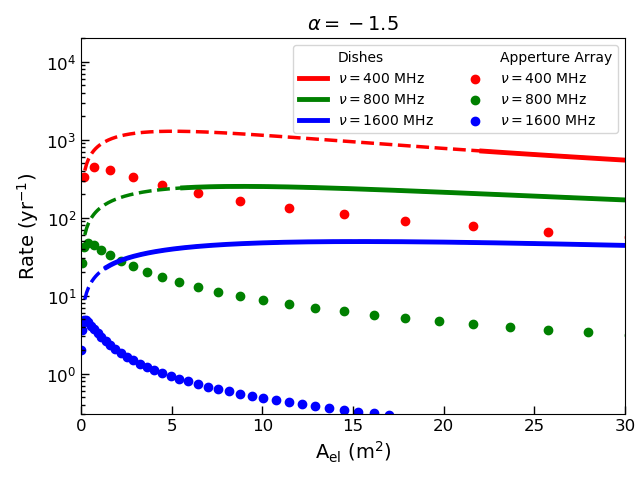

In [9]:

fig, ax = subplots()

plot(Ael[1:], rate400_a15_d[1:], lw = 2.5 ,ls ='--', c = 'r')
plot(Ael[1:], rate800_a15_d[1:], lw = 2.5, ls = '--', c = 'g')
plot(Ael[1:], rate1600_a15_d[1:], lw = 2.5, ls = '--', c = 'b')


# Dishes with diameter < 5 lamda not made

i0 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[0]*1e6)),2))/0.5)
i1 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[1]*1e6)),2))/0.5)
i2 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[2]*1e6)),2))/0.5)

plot([], [], label = r'Dishes', lw = 3.5, c = 'w', alpha = 0.01 )
plot(Ael[i0], rate400_a15_d[i0], label = r'$\nu = 400 \rm{\ MHz}$', lw = 3.5, c = 'r' )
plot(Ael[i1], rate800_a15_d[i1], label = r'$\nu = 800 \rm{\ MHz}$',  lw = 3.5, c = 'g' )
plot(Ael[i2], rate1600_a15_d[i2], label = r'$\nu = 1600 \rm{\ MHz}$', lw = 3.5, c = 'b' )

scatter([], [], label = r'Apperture Array', lw = 3.5, c = 'w', alpha = 0.01 )
scatter(Aeff[0], rate400_a15_aa, label = r'$\nu = 400 \rm{\ MHz}$',  c = 'r' )
scatter(Aeff[1], rate800_a15_aa, label = r'$\nu = 800 \rm{\ MHz}$',  c = 'g' )
scatter(Aeff[2], rate1600_a15_aa, label = r'$\nu = 1600 \rm{\ MHz}$', c = 'b' )


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

xticks(fontsize = 12)
yticks(fontsize = 12)

yscale("log")
xlabel(r'$\rm{A_{el} \ (m^2)}$',fontdict=font)
ylabel(r'Rate ($\rm{yr^{-1}}$)', fontdict=font)
title(r'$\alpha = -1.5$',fontdict=font)
ax.tick_params(which='both', direction = 'in')
ax.tick_params(which='major', length=6, width = 1)
ax.tick_params(which='minor', length=3, width = 1)

legend(ncol = 2)#, bbox_to_anchor=(1,1))
tight_layout()
xlim(0,30)
ylim(0.3, 2e4)


savefig('ratevsaeff_alpha15.png')

<IPython.core.display.Javascript object>


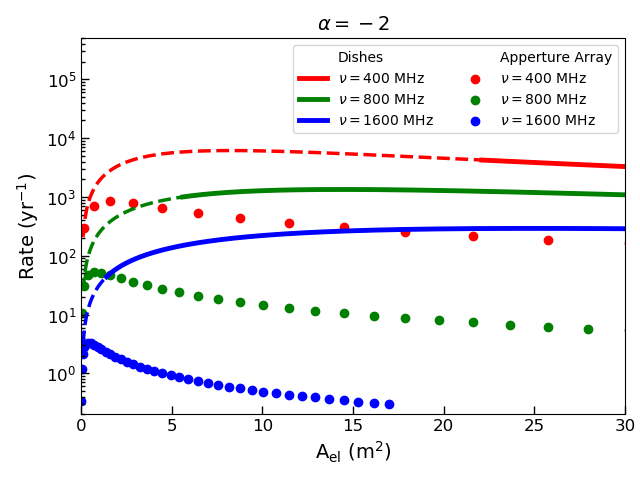

In [10]:

fig, ax = subplots()

plot(Ael, rate400_a2_d , lw = 2.5 ,ls ='--', c = 'r')
plot(Ael, rate800_a2_d , lw = 2.5, ls = '--', c = 'g')
plot(Ael, rate1600_a2_d, lw = 2.5, ls = '--', c = 'b')


# Dishes with diameter < 5 lamda not made

i0 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[0]*1e6)),2))/0.5)
i1 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[1]*1e6)),2))/0.5)
i2 = np.where(Ael > ( np.pi * np.power((2.5*c/(nu[2]*1e6)),2))/0.5)

plot([], [], label = r'Dishes', lw = 3.5, c = 'w', alpha = 0.01 )
plot(Ael[i0], rate400_a2_d[i0], label = r'$\nu = 400 \rm{\ MHz}$', lw = 3.5, c = 'r' )
plot(Ael[i1], rate800_a2_d[i1], label = r'$\nu = 800 \rm{\ MHz}$',  lw = 3.5, c = 'g' )
plot(Ael[i2], rate1600_a2_d[i2], label = r'$\nu = 1600 \rm{\ MHz}$', lw = 3.5, c = 'b' )

scatter([], [], label = r'Apperture Array', lw = 3.5, c = 'w', alpha = 0.01 )
scatter(Aeff[0], rate400_a2_aa, label = r'$\nu = 400 \rm{\ MHz}$',  c = 'r' )
scatter(Aeff[1], rate800_a2_aa, label = r'$\nu = 800 \rm{\ MHz}$',  c = 'g' )
scatter(Aeff[2], rate1600_a2_aa, label = r'$\nu = 1600 \rm{\ MHz}$', c = 'b' )


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
       }

xticks(fontsize = 12)
yticks(fontsize = 12)

yscale("log")
xlabel(r'$\rm{A_{el} \ (m^2)}$',fontdict=font)
ylabel(r'Rate ($\rm{yr^{-1}}$)', fontdict=font)
title(r'$\alpha = -2$',fontdict=font)
ax.tick_params(which='both', direction = 'in')
ax.tick_params(which='major', length=6, width = 1)
ax.tick_params(which='minor', length=3, width = 1)

legend(ncol = 2)#, bbox_to_anchor=(1,1))
tight_layout()
xlim(0,30)
ylim(0.2, 5e5)

savefig('ratevsaeff_alpha2.png')